In [1]:
import numpy as np
import sys
from qutip import *
import matplotlib.pyplot as plt
from pathlib import Path

parent_path = ".." #str(Path(__file__).resolve().parents[1])
sys.path.append(parent_path)

import fluxonium
import time
import os
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [2]:
""" Parameters from from Schuster et al """

ec_ref = 0.479 #GHz
ec = 1    # unit fixed to 1
ej = 3.395/ec_ref 
el = 0.132/ec_ref 
phi_bias = 1/2*2*np.pi*0.95
n_fock = 1000
n_points = 1000
n_lev = 10
delta = 4
n_fock_wave = 150 # higher than 160 it crashes when calculating wave function
save = False

flx = fluxonium.Fluxonium(ec, ej, el, phi_bias)

In [3]:
""" Fluxonium potential """

phi_vec = np.linspace(-delta*np.pi, delta*np.pi, n_points)
v_flx = flx.potential(phi_vec)

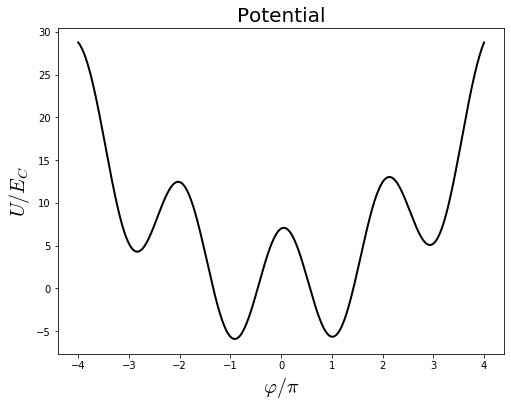

In [4]:
""" Plot fluxonium potential """

fig_pot, ax_pot = plt.subplots(figsize = (8, 6))
ax_pot.plot(phi_vec/np.pi, v_flx, color = 'black', linewidth = 2.0)
ax_pot.set_xlabel('$\\varphi/\pi$', fontsize = 20)
ax_pot.set_ylabel('$U/E_C$', fontsize = 20)
ax_pot.set_title('Potential', fontsize = 20)
plt.show()


In [5]:
eig_en, eig_vec = flx.eigenstates(n_fock)



In [6]:

""" Wave functions """

psi = np.zeros([n_lev, n_points], dtype = complex)
for k in range(0, n_lev):
    for m in range(0, n_points):
        psi[k, m] = fluxonium.wave_function(flx.m, flx.omega0, 1,\
            phi_vec[m]/(np.sqrt(2)*flx.r_phi), eig_vec[k][0: n_fock_wave])


C:\Users\nicol\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\nicol\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\nicol\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\nicol\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


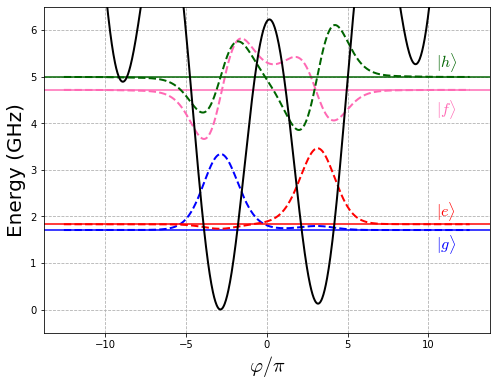

In [7]:
""" Plot wave functions Fig 1.c in the paper """

ymin = -0.5
ymax = 6.5
lw = 2.0 #linewidth
fs = 20 #fontsize
ampl = flx.ej*2/3
colors = ['blue', 'red', 'hotpink', 'darkgreen']
text_pos = [1.3, 2.0, 4.2, 5.2]
text_lab = ["$| g\\rangle $", "$| e \\rangle $", "$| f \\rangle $", \
    "$| h\\rangle $"]
fig_wf, ax_wf = plt.subplots(figsize=(8,6))
for k in range(0, 4):
    shift = eig_en[k]
    ax_wf.axhline(y=(shift - np.min(v_flx))*ec_ref, color=colors[k])
    ax_wf.plot(phi_vec, (ampl*psi[k, :] + shift - np.min(v_flx))*ec_ref, \
        '--', color=colors[k], linewidth=lw)
    plt.text(10.5, text_pos[k], text_lab[k], fontsize=16, color=colors[k])
ax_wf.plot(phi_vec, (v_flx - np.min(v_flx))*ec_ref, color='black', \
    linewidth=lw)
ax_wf.set_xlabel('$\\varphi/\pi$', fontsize=fs)
ax_wf.set_ylabel('Energy (GHz)', fontsize=fs)
ax_wf.set_ylim([ymin, ymax])
plt.grid(linestyle = '--')
if save==True:
    fig_wf.savefig('zhang_levels.pdf')
plt.show(block=False)


In [8]:
""" Qubit frequency and transition frequencies between other levels """

delta_eg = (eig_en[1] - eig_en[0])*ec_ref
delta_fe = (eig_en[2] - eig_en[1])*ec_ref
delta_hf = (eig_en[3] - eig_en[2])*ec_ref
print('\Delta_{eg} = ' + str(delta_eg) + ' GHz')
print('\Delta_{fe} = ' + str(delta_fe) + ' GHz')
print('\Delta_{hf} = ' + str(delta_hf) + ' GHz')

\Delta_{eg} = 0.12428795212939137 GHz
\Delta_{fe} = 2.8835317938353056 GHz
\Delta_{hf} = 0.2774561750494113 GHz


In [9]:
fold = parent_path + 'papers/zhang_schuster_2020/levels'
lev = ['g', 'e', 'f', 'h']
if save == True:
    np.save(fold + '/phi_vec', phi_vec)
    np.save(fold + '/phi_vec', v_flx)
    np.save(fold + '/eig_en', eig_en[0:10])
    np.save(fold + '/eig_en', eig_en[0:10])
    for k in range(0, len(lev)):
        np.save(fold + '/psi_' + lev[k], psi[k, :])
    param_file = open(fold + '/summary.txt', \
        "w+")
    param_file.write('The data where generated using the simulated \n')
    param_file.write('ec = ' + str(ec_ref) + ' GHz \n')
    param_file.write('ej = ' + str(ej*ec_ref) + ' GHz \n')
    param_file.write('el = ' + str(el*ec_ref) + ' GHz \n')
    param_file.write('phi_bias = ' + str(phi_bias) + ' GHz \n')
    param_file.write('n_fock = ' + str(n_fock) + ' GHz \n')
    param_file.write('n_fock_wave = ' + str(n_fock_wave) + ' GHz \n')
    param_file.write('We obtain the following transition frequencies: \n')
    param_file.write('delta_eg = ' + str(delta_eg) + ' GHz \n')
    param_file.write('delta_fe = ' + str(delta_fe) + ' GHz \n')
    param_file.write('delta_hf = ' + str(delta_hf) + ' GHz \n')